# Histograms
  

In [2]:
## Pandas

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np 

sns.set_style('whitegrid')
# sns.despine(offset=10, trim=True);

In [3]:
data =[{'truth': 'Airplane', 'count': 7838}, {'truth': 'Barnacle-Goose', 'count': 333}, {'truth': 'Black-Throated-Diver', 'count': 537}, {'truth': 'Buzzard', 'count': 152846}, {'truth': 'Common-Buzzard', 'count': 67256}, {'truth': 'Common-Crane', 'count': 6026}, {'truth': 'Common-Eider', 'count': 326}, {'truth': 'Common-Gull', 'count': 14065}, {'truth': 'Common-Loon', 'count': 6}, {'truth': 'Common-Raven', 'count': 2625}, {'truth': 'Crow-sp.', 'count': 284423}, {'truth': 'Curlew', 'count': 3204}, {'truth': 'Drone', 'count': 1}, {'truth': 'Eagle', 'count': 65370}, {'truth': 'Eurasian-Curlew', 'count': 838}, {'truth': 'Flock-Of-Birds', 'count': 4087}, {'truth': 'Golden-Eagle', 'count': 228637}, {'truth': 'Goose-spec.', 'count': 5885}, {'truth': 'Great-Black-Backed-Gull', 'count': 5719}, {'truth': 'Great-Cormorant', 'count': 70664}, {'truth': 'Grey-Heron', 'count': 9548}, {'truth': 'Greylag-Goose', 'count': 3648}, {'truth': 'Gull', 'count': 226351}, {'truth': 'Harrier', 'count': 73}, {'truth': 'Hawk', 'count': 259}, {'truth': 'Helicopter', 'count': 1701}, {'truth': 'Heron-sp.', 'count': 42164}, {'truth': 'Herring-Gull', 'count': 75940}, {'truth': 'Mute-Swan', 'count': 2352}, {'truth': 'Northern-Goshawk', 'count': 2975}, {'truth': 'Northern-Lapwing', 'count': 14711}, {'truth': 'Osprey', 'count': 2022}, {'truth': 'Other-Avian', 'count': 683904}, {'truth': 'Other-Avian-Gotland', 'count': 173183}, {'truth': 'Other-Non-Avian', 'count': 69778}, {'truth': 'Peregrine-Falcon', 'count': 1205}, {'truth': 'Raven', 'count': 69729}, {'truth': 'Red-Kite', 'count': 29405}, {'truth': 'Red-Or-Black-Kite', 'count': 11846}, {'truth': 'Swan-sp.', 'count': 1014}, {'truth': 'Turbine-Antenna', 'count': 307}, {'truth': 'Turbine-Blade', 'count': 460}, {'truth': 'Turbine-Hub', 'count': 1}, {'truth': 'Turbine-Other', 'count': 2398}, {'truth': 'Turbine-Text', 'count': 25}, {'truth': 'Turbine-Vent', 'count': 5}, {'truth': 'Turkey-Vulture', 'count': 235}, {'truth': 'Unknown', 'count': 2336838}, {'truth': 'White-Tailed-Eagle', 'count': 359439}, {'truth': 'Whooper-Swan', 'count': 500}, {'truth': 'Woodpigeon', 'count': 15918}]


data = {d['truth']: d['count'] for d in data}
labels = list(data.keys())
counts = list(data.values())



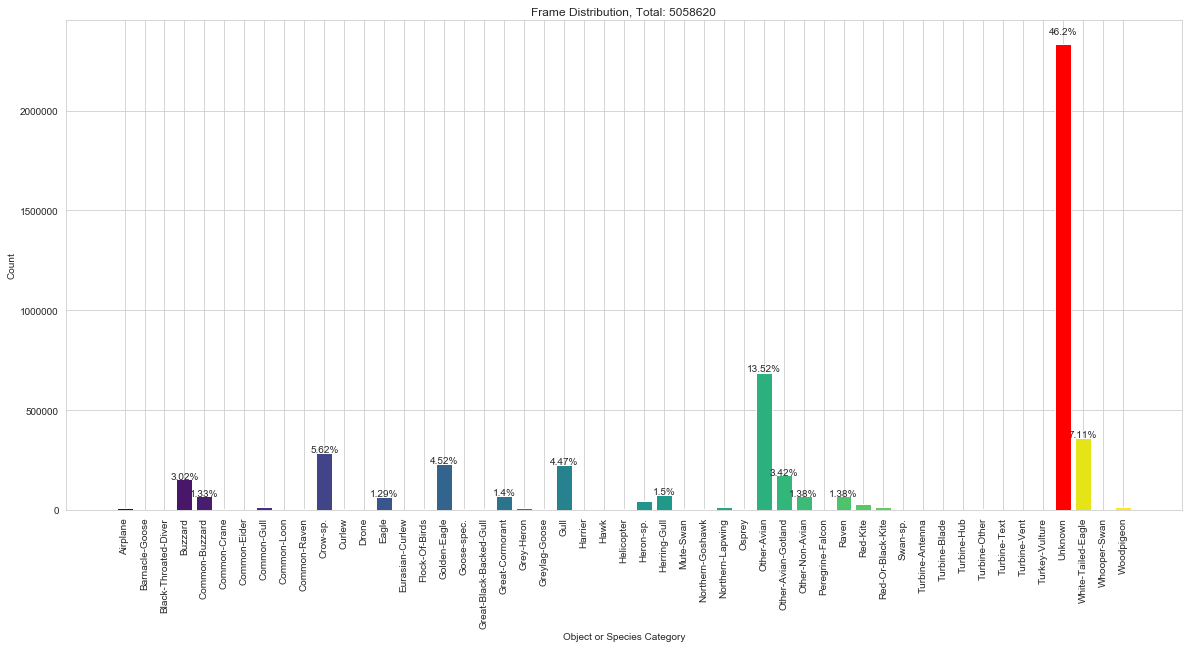

In [4]:
fig= plt.figure(figsize=(20, 10))  # width:20, height:3
ax = fig.add_subplot(111)
plt.bar(labels, height=counts, color='orange')
plt.xticks(range(len(labels)), rotation='vertical')
# plt.yticks(range(len(counts)))
total = np.sum(counts)
plt.title("Frame Distribution, Total: {}".format(total))
plt.xlabel('Object or Species Category')
plt.ylabel('Count')
n = counts
i = 0
colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(counts)))
plt.gcf().subplots_adjust(bottom=.2)
for p, color in zip(ax.patches, colors):
    width = p.get_width()
    height = p.get_height()
    pct = round(height/total * 100, 2)
    x, y = p.get_xy() 
    if labels[i] == 'Unknown':
        p.set_facecolor('r')
    else:
        p.set_facecolor(color)
    if pct > 1:
        ax.annotate(f'{pct}%', (x + width/2, y + height*1.02), ha='center')
    # p.set_facecolor(plt.cm.viridis(pct/max(n)))
    # print(width, height)
    i += 1

In [55]:
with PdfPages('plot.pdf') as pdf:
    pdf.savefig(fig, dpi=500)

In [1]:
df = pd.DataFrame(data)

NameError: name 'pd' is not defined

In [57]:
df = pd.DataFrame({"Groundtruth": labels, "Count": counts})

In [2]:
sns.pointplot(df)

NameError: name 'sns' is not defined

In [74]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import pylab as pl
import numpy as np 

sns.set()


Max:  4999
Mean:  962
Stdev: 399
Median:  910


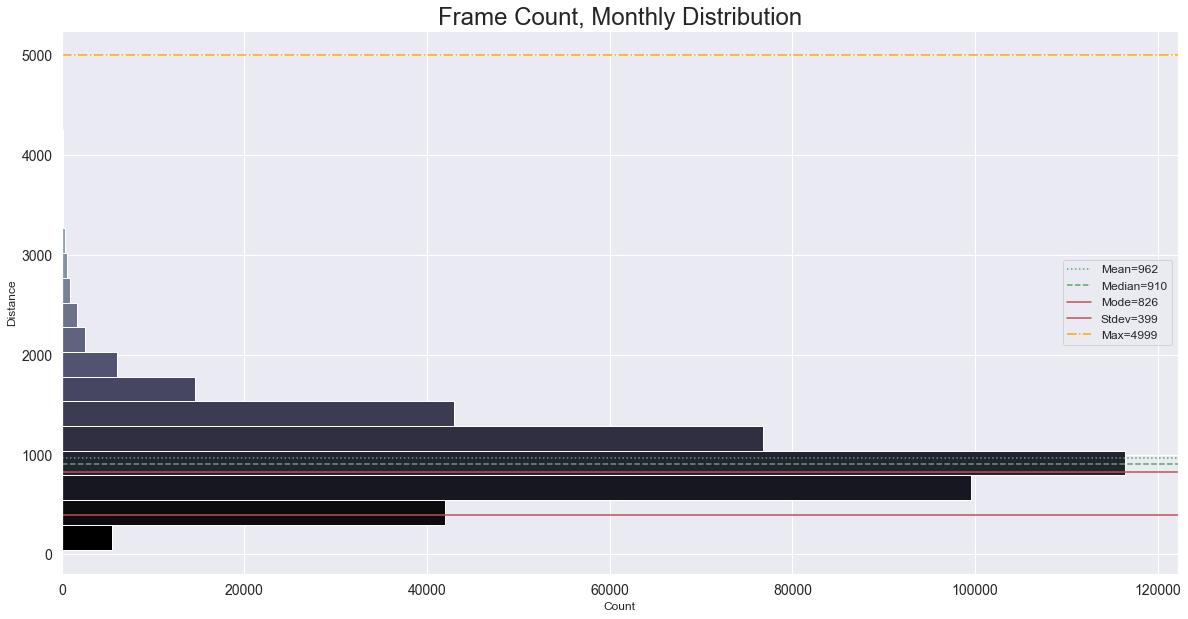

In [155]:
df = pd.read_csv('e3-all.csv')
import calendar
df['inspectiontime'] = df['inspectiontime'].astype("datetime64")
distance = list(df['distance'])
# print(df.head())
months = df.groupby(df['inspectiontime'].dt.month).count()
years = df.groupby(df['inspectiontime'].dt.year).count()

# print(months.to_dict())
labels = [calendar.month_name[x] for x in months['distance'].keys()]
counts = months['distance']


assert len(labels) == len(counts)

distance = [v for v in distance if v > 0 and v < 5000]

mean = round(statistics.mean(distance))
maxx = round(max(distance))

mode = round(statistics.mode(distance))
stdev = round(statistics.stdev(distance))
median = round(statistics.median(distance))

print("Max: ", maxx)
print("Mean: ", mean)
print("Stdev:", stdev)
print("Median: ", median)

# seaborn.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})

# # cmap = sns.color_palette("jet", as_cmap=True)
fig, axes = plt.subplots(figsize=(20,10))
distance_ax = sns.histplot(y=distance, bins=20, ax=axes)
distance_ax.set_ylabel('Distance')
axes.axhline(mean, color='g', linestyle=':')
axes.axhline(median, color='g', linestyle='--')
axes.axhline(mode, color='r', linestyle='-')
axes.axhline(stdev, color='r', linestyle=None)
axes.axhline(maxx, color='Orange', linestyle='-.')

# months.plot(kind='bar', y='inspectiontime', ax=axes)

# print(ax)
patches = axes.patches
# colors = pl.get_cmap('jet', len(patches))
colors = plt.get_cmap('bone', len(patches))
for i in range(len(patches)):
    patches[i].set_facecolor(colors(i))
title = "Frame Count, Monthly Distribution"

plt.title(title, fontsize=24)
plt.tick_params(labelsize=14)
# plt.xlabel(xlabel='Month', fontsize=14)
# plt.ylabel(ylabel='Count', fontsize=14)
plt.legend({'Mean={}'.format(round(mean)):mean,
            'Median={}'.format(median):median,'Mode={}'.format(mode):mode, 'Stdev={}'.format(stdev):stdev,
            'Max={}'.format(maxx): maxx}, loc=0, prop={'size': 12})



In [174]:
from sklearn.metrics import confusion_matrix
predicted = list( cat for cat in df['nn_category'] if cat in ['Other-Avian-DE', 'Red-Or-Black-Kite', 'White-Tailed-Eagle', 'Buzzard'])
groundtruth = ['White-Tailed-Eagle']*len(predicted)
assert len(predicted) == len(groundtruth)
# cm_data = pd.DataFrame({'groundtruth': groundtruth, 'predicted': predicted, 'labels': list(set(predicted))})
for cat, conf in zip(predicted, groundtruth):
    print(cat, conf)
print(list(set(predicted)))
cm = confusion_matrix(groundtruth, predicted)

['Other-Avian-DE', 'Red-Or-Black-Kite', 'White-Tailed-Eagle', 'Buzzard']


<class 'matplotlib.figure.Figure'>


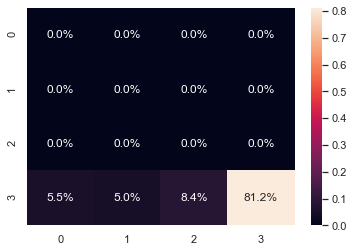

In [182]:
fig = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.1%')
print(type(fig.get_figure()))